### Plot the seasonal cycle of the equatorial Indian Jet

In [1]:
%matplotlib inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import xarray as xr
import pandas as pd

netcdf_index loaded.


In [2]:
## Load zonal velocity from expt - last 4 outputs (TODO: would prefer to do this by year)
u_01 = cc.get_nc_variable('mom01v5/KDS75_newbathy_JRA_runoff', 'ocean.nc', 'u',n=3, time_units = 'days since 1901-01-01').isel(st_ocean=0).sel(time=slice('1910-01','1910-12'))
u_01.data, u_01.xu_ocean.data = shiftgrid(0., u_01.data, u_01.xu_ocean.data, start=True)

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=3), HTML(value='')))

In [3]:
time = pd.date_range('1911-01-01', periods=365*10, freq='D')
time.values

array(['1911-01-01T00:00:00.000000000', '1911-01-02T00:00:00.000000000',
       '1911-01-03T00:00:00.000000000', ...,
       '1920-12-26T00:00:00.000000000', '1920-12-27T00:00:00.000000000',
       '1920-12-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [4]:
## Load zonal velocity from expt - last 4 outputs (TODO: would prefer to do this by year)
tmp = cc.get_nc_variable('access-om2/1deg_jra55_ryf9091_kds75_sss6p5', 'ocean_daily.nc', 'usurf',n=1, time_units = 'days since 1700-01-01')
#u_10.data, u_10.xu_ocean.data = shiftgrid(0., u_10.data, u_10.xu_ocean.data, start=True)
tmp.time.values = time.values
u_10 = tmp.groupby('time.month').mean('time')
u_10.data, u_10.xu_ocean.data = shiftgrid(0., u_10.data, u_10.xu_ocean.data, start=True)
del(tmp)
u_10.shape

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=1), HTML(value='')))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/core.py:306: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif type_arg is type(key) and arg == key:
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(12, 300, 360)

### Read the observation data for reference. 

Reference:
        Laurindo, L., A. Mariano, and R. Lumpkin, 2017: An improved near-surface velocity climatology for the global ocean from drifter observations Deep-Sea Res. I, 124, pp.73-92, doi:10.1016/j.dsr.2017.04.009 .

In [5]:
obs_file = xr.open_dataset('/g/data3/hh5/tmp/cosima/observations/original/drifter_monthlymeans.nc').rename({'Lat':'latitude','Lon':'longitude'})
obs_u = obs_file['U']
obs_u.shape

(317, 720, 12)

In [6]:
# latitude: 5S-5N, longitude: 45E-100E
u_01_eq = u_01.sel(yu_ocean=slice(-5,5)).sel(xu_ocean=slice(45,100))
m_u_01_eq = u_01_eq.mean('yu_ocean')
a_u_01_eq = np.ma.anom(m_u_01_eq,axis=0)
a_u_01_eq.shape

(12, 549)

In [7]:
# latitude: 5S-5N, longitude: 45E-100E
u_10_eq = u_10.sel(yu_ocean=slice(-5,5)).sel(xu_ocean=slice(45,100))
m_u_10_eq = u_10_eq.mean('yu_ocean')
a_u_10_eq = np.ma.anom(m_u_10_eq,axis=0)
a_u_10_eq.shape

(12, 56)

In [8]:
# latitude: 5S-5N, longitude: 45E-100E
obs_u_eq = obs_u.sel(latitude=slice(-5,5)).sel(longitude=slice(45,100))
m_obs_u_eq = obs_u_eq.mean('latitude')
a_obs_u_eq = np.ma.anom(m_obs_u_eq,axis=1)
new_a_obs_u_eq = np.transpose(a_obs_u_eq)
new_a_obs_u_eq.shape

(12, 111)

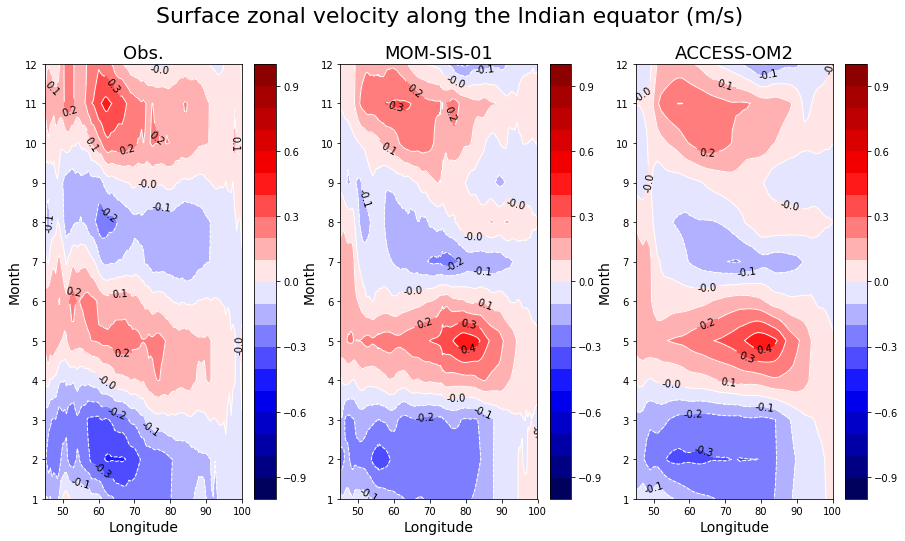

In [9]:
Tmax = 1; Tmin = -Tmax; delT = 0.1
clevels = np.arange(Tmin,Tmax+delT,delT)
new_ticks = np.linspace(1, 12, 12)

fig_eqobs = plt.figure( figsize=(15,8) )
ax = fig_eqobs.add_subplot(131)
cax = ax.contourf( obs_u_eq.longitude, np.arange(12)+1, new_a_obs_u_eq, levels=clevels, cmap=plt.cm.seismic )#cmap=plt.cm.jet)
ax1 = ax.contour(obs_u_eq.longitude, np.arange(12)+1, new_a_obs_u_eq, colors = 'w', linewidths=1,levels=clevels)
plt.clabel(ax1, fmt='%2.1f', colors='black', fontsize=10)
plt.yticks(new_ticks)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Month', fontsize=14 )
cbar = plt.colorbar(cax)
ax.set_title('Obs.', fontsize=18)

ax = fig_eqobs.add_subplot(132)
cax = ax.contourf( u_01_eq.xu_ocean, np.arange(12)+1, a_u_01_eq, levels=clevels, cmap=plt.cm.seismic )#cmap=plt.cm.jet)
ax1 = ax.contour(u_01_eq.xu_ocean, np.arange(12)+1, a_u_01_eq, colors = 'w', linewidths=1,levels=clevels)
plt.clabel(ax1, fmt='%2.1f', colors='black', fontsize=10)
plt.yticks(new_ticks)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Month', fontsize=14 )
cbar = plt.colorbar(cax)
ax.set_title('MOM-SIS-01', fontsize=18)

ax = fig_eqobs.add_subplot(133)
cax = ax.contourf( u_10_eq.xu_ocean, np.arange(12)+1, a_u_10_eq, levels=clevels, cmap=plt.cm.seismic )#cmap=plt.cm.jet)
ax1 = ax.contour(u_10_eq.xu_ocean, np.arange(12)+1, a_u_10_eq, colors = 'w', linewidths=1,levels=clevels)
plt.clabel(ax1, fmt='%2.1f', colors='black', fontsize=10)
plt.yticks(new_ticks)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Month', fontsize=14 )
cbar = plt.colorbar(cax)
ax.set_title('ACCESS-OM2', fontsize=18)

fig_eqobs.suptitle('Surface zonal velocity along the Indian equator (m/s)', fontsize=22)
plt.savefig('u_seasonal_cycle_ind_eq.png')